In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import sys

sys.path.append("..")

from src.data.dqc_layer import DQC
from src.data.eda_layer import EDA

In [3]:
# !cd data/raw/ && wget https://data.cityofnewyork.us/api/views/nwxe-4ae8/rows.csv?accessType=DOWNLOAD -O 2015-street-tree-census-tree-data.csv

In [3]:
trees_df = pd.read_csv(
    "../data/raw/tree-data.csv",
    parse_dates=["created_at"],
    keep_default_na=False,
    na_values=["NA", "missing", ""],
)

In [4]:
trees_df.shape

(683788, 45)

In [3]:
pd.set_option("display.max_columns", None)

trees_df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,2015-08-27,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [ ]:
data = trees_df.drop(["tree_id", "block_id"], axis=1).copy()

# EDA

## Conducting a Data Quality Check

In [60]:
data_dqc = DQC()

In [61]:
data_dqc.data_review(data, ["tree_dbh", "stump_diam"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   created_at        683788 non-null  datetime64[ns]
 1   tree_dbh          683788 non-null  int64         
 2   stump_diam        683788 non-null  int64         
 3   curb_loc          683788 non-null  object        
 4   status            683788 non-null  object        
 5   health            652172 non-null  object        
 6   spc_latin         652169 non-null  object        
 7   spc_common        652169 non-null  object        
 8   steward           652173 non-null  object        
 9   guards            652172 non-null  object        
 10  sidewalk          652172 non-null  object        
 11  user_type         683788 non-null  object        
 12  problems          652124 non-null  object        
 13  root_stone        683788 non-null  object        
 14  root

In [62]:
data_dqc.na_values_check(data)
_ = data_dqc.consistency_uniqueness_check(data, consistency_columns=["health"])


Number of rows with missing values: 40827

Details of rows with missing values:
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude 

## Examining the distribution of data features

### Spacial analysis

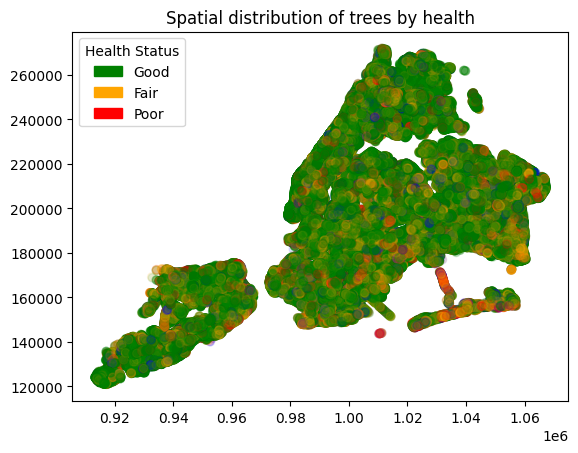

In [22]:
color_map = {"Good": "green", "Fair": "orange", "Poor": "red", np.nan: "blue"}
colors = [color_map[cat] for cat in data["health"]]

plt.scatter(data["x_sp"], data["y_sp"], alpha=0.1, c=colors)
plt.title("Spatial distribution of trees by health")
legend_patches = [
    mpatches.Patch(color=color, label=label)
    for label, color in color_map.items()
    if not pd.isna(label)
]
plt.legend(handles=legend_patches, title="Health Status")
plt.show()

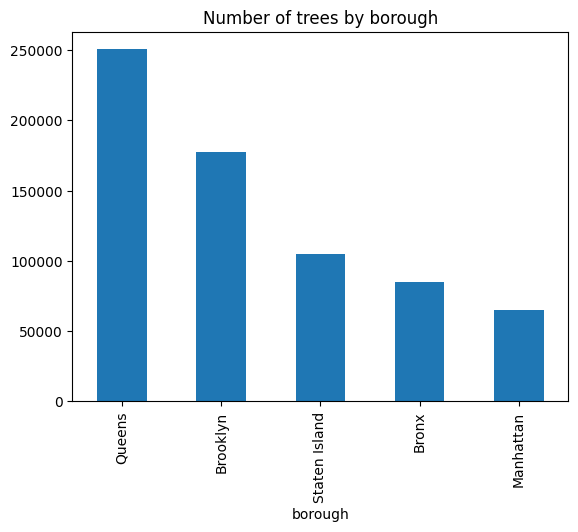

In [40]:
data["borough"].value_counts().plot(kind="bar")
plt.title("Number of trees by borough")
plt.show()

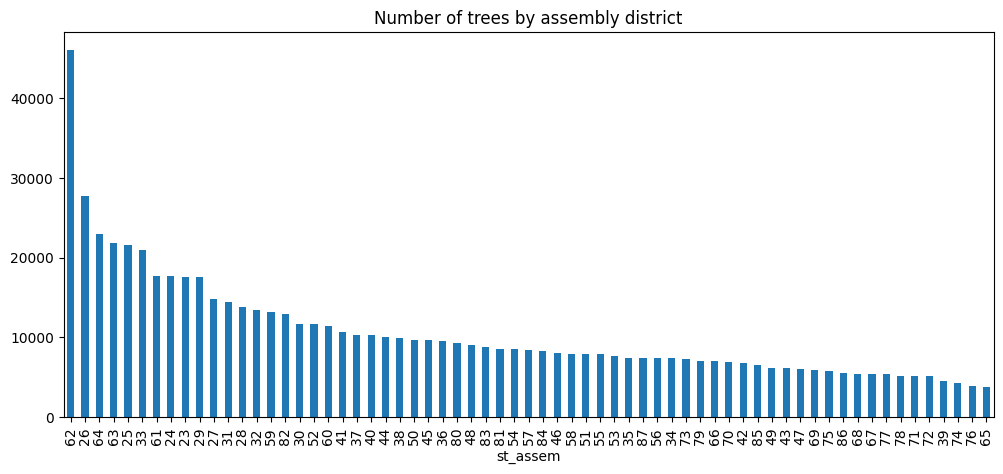

In [43]:
data["st_assem"].value_counts().plot(kind="bar", figsize=(12, 5))
plt.title("Number of trees by assembly district")
plt.show()

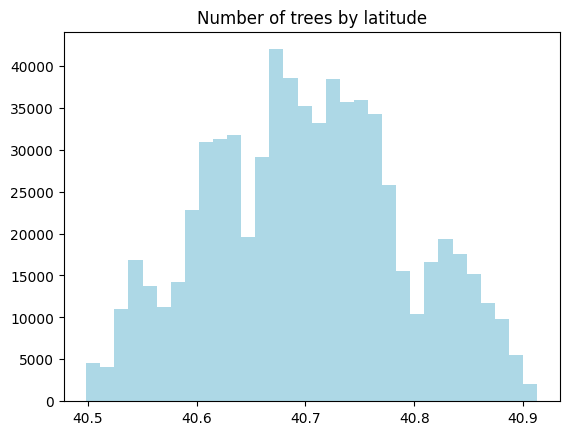

In [48]:
plt.hist(data["latitude"], bins=32, color="lightblue")
plt.title("Number of trees by latitude")
plt.show()

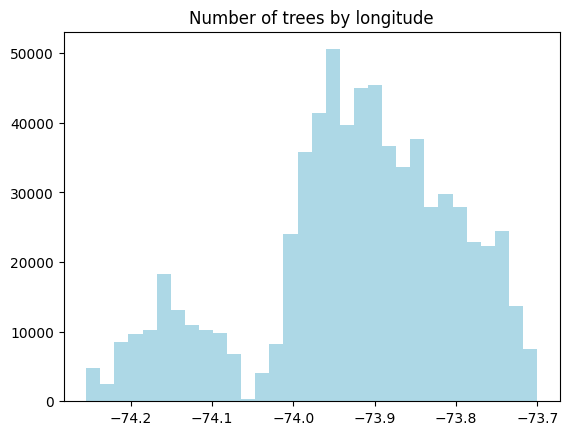

In [49]:
plt.hist(data["longitude"], bins=32, color="lightblue")
plt.title("Number of trees by longitude")
plt.show()

* Two normal distributions. But since we already have spatial features that indicate the area, region, location of the tree, it is not necessary to perform transformations for this feature in the future.

### Analysis by types of trees and problems

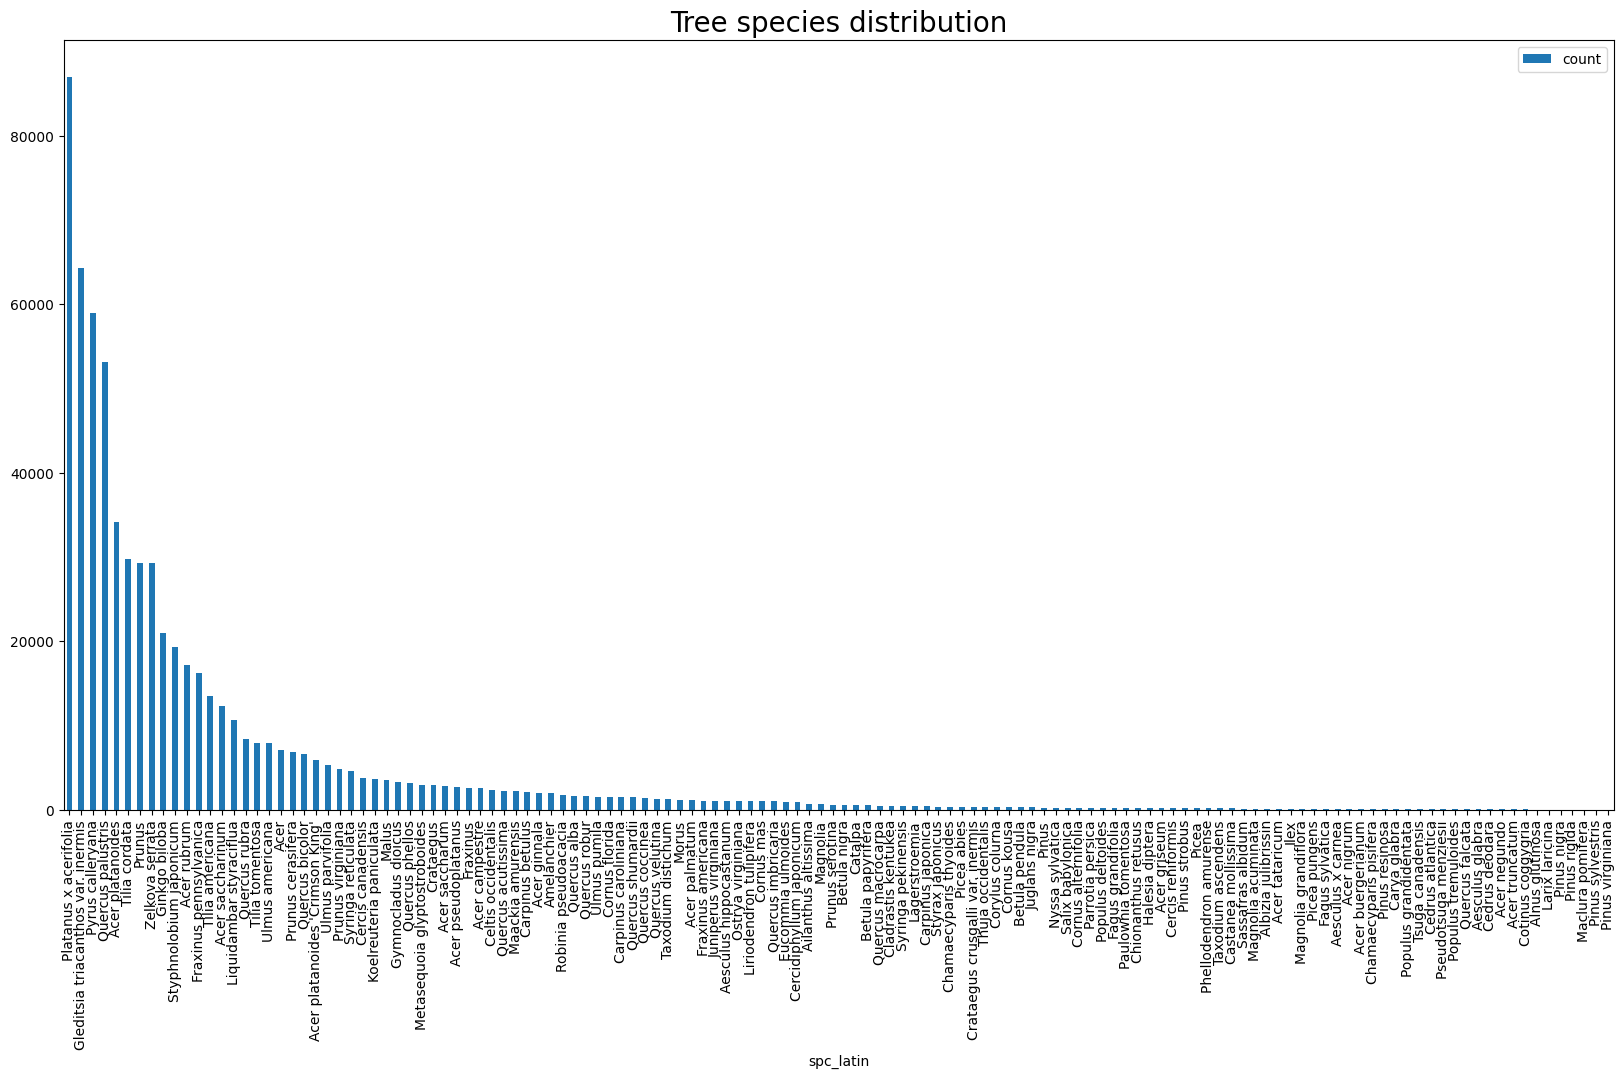

In [27]:
pd.DataFrame(data["spc_latin"].value_counts()).plot(kind="bar", figsize=(20, 10))
plt.title("Tree species distribution", fontsize=20)
plt.show()

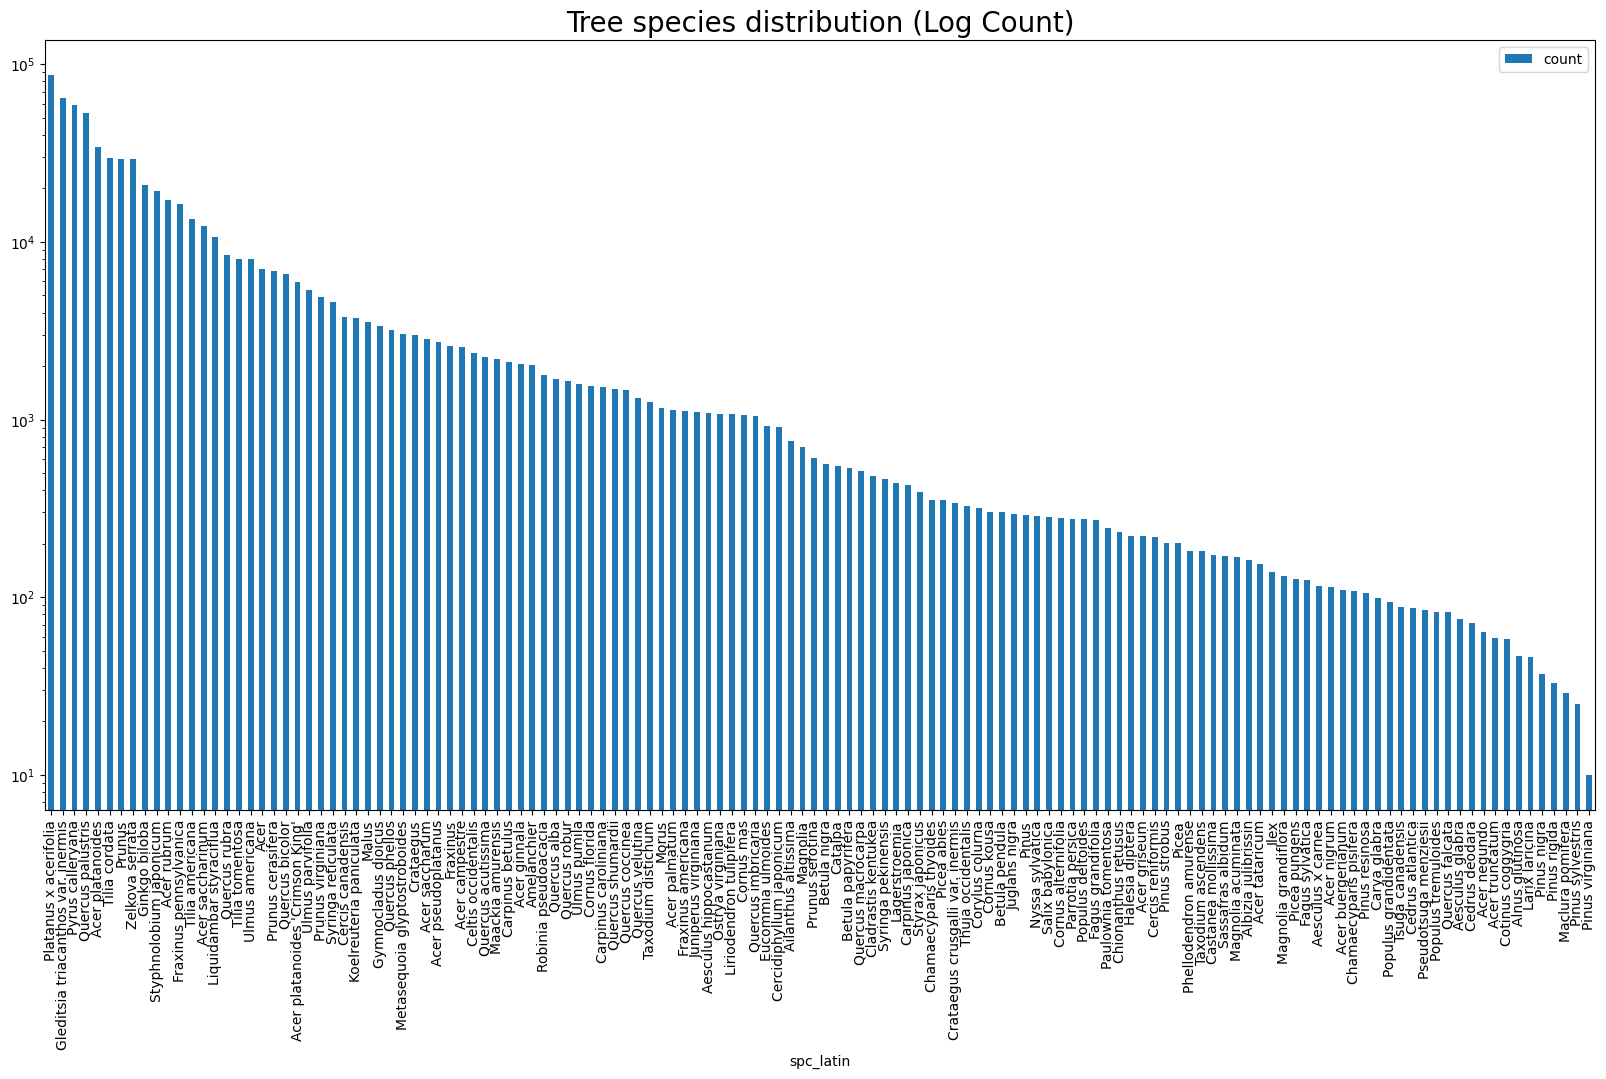

In [29]:
pd.DataFrame(data["spc_latin"].value_counts()).plot(
    kind="bar", figsize=(20, 10), logy=True
)
plt.title("Tree species distribution (Log Count)", fontsize=20)
plt.show()

In [ ]:
print("Number of unique original tree names : ", len(data["spc_latin"].unique()))
print("Number of unique tree 'aliases' : ", len(data["spc_common"].unique()))

Number of unique original tree names :  133
Number of unique tree 'aliases' :  133


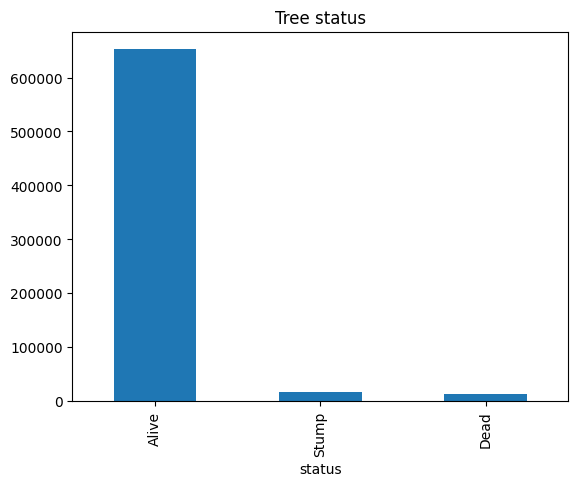

In [11]:
data["status"].value_counts().plot(kind="bar")
plt.title("Tree status")
plt.show()

In [ ]:
data[data["status"] == "Stump"].value_counts()

In [ ]:
data[data["status"] == "Dead"].value_counts()

* There is no health status for dead trees and stumps

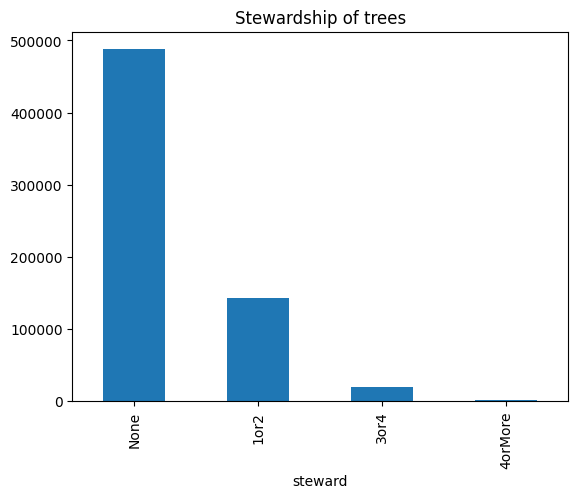

In [12]:
data["steward"].value_counts().plot(kind="bar")
plt.title("Stewardship of trees")
plt.show()

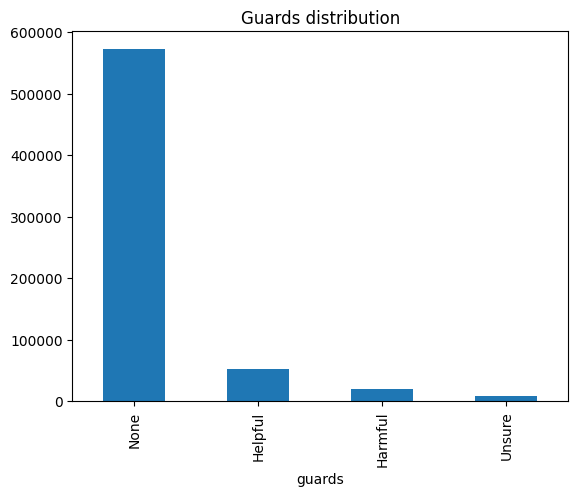

In [13]:
data["guards"].value_counts().plot(kind="bar")
plt.title("Guards distribution")
plt.show()

In [12]:
tree_problems = data[
    [
        "root_stone",
        "root_grate",
        "root_other",
        "trunk_wire",
        "trnk_light",
        "trnk_other",
        "brch_light",
        "brch_shoe",
        "brch_other",
    ]
]

print("Statistics on tree problems:")
tree_problems.apply(pd.Series.value_counts)

Statistics on tree problems:


,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


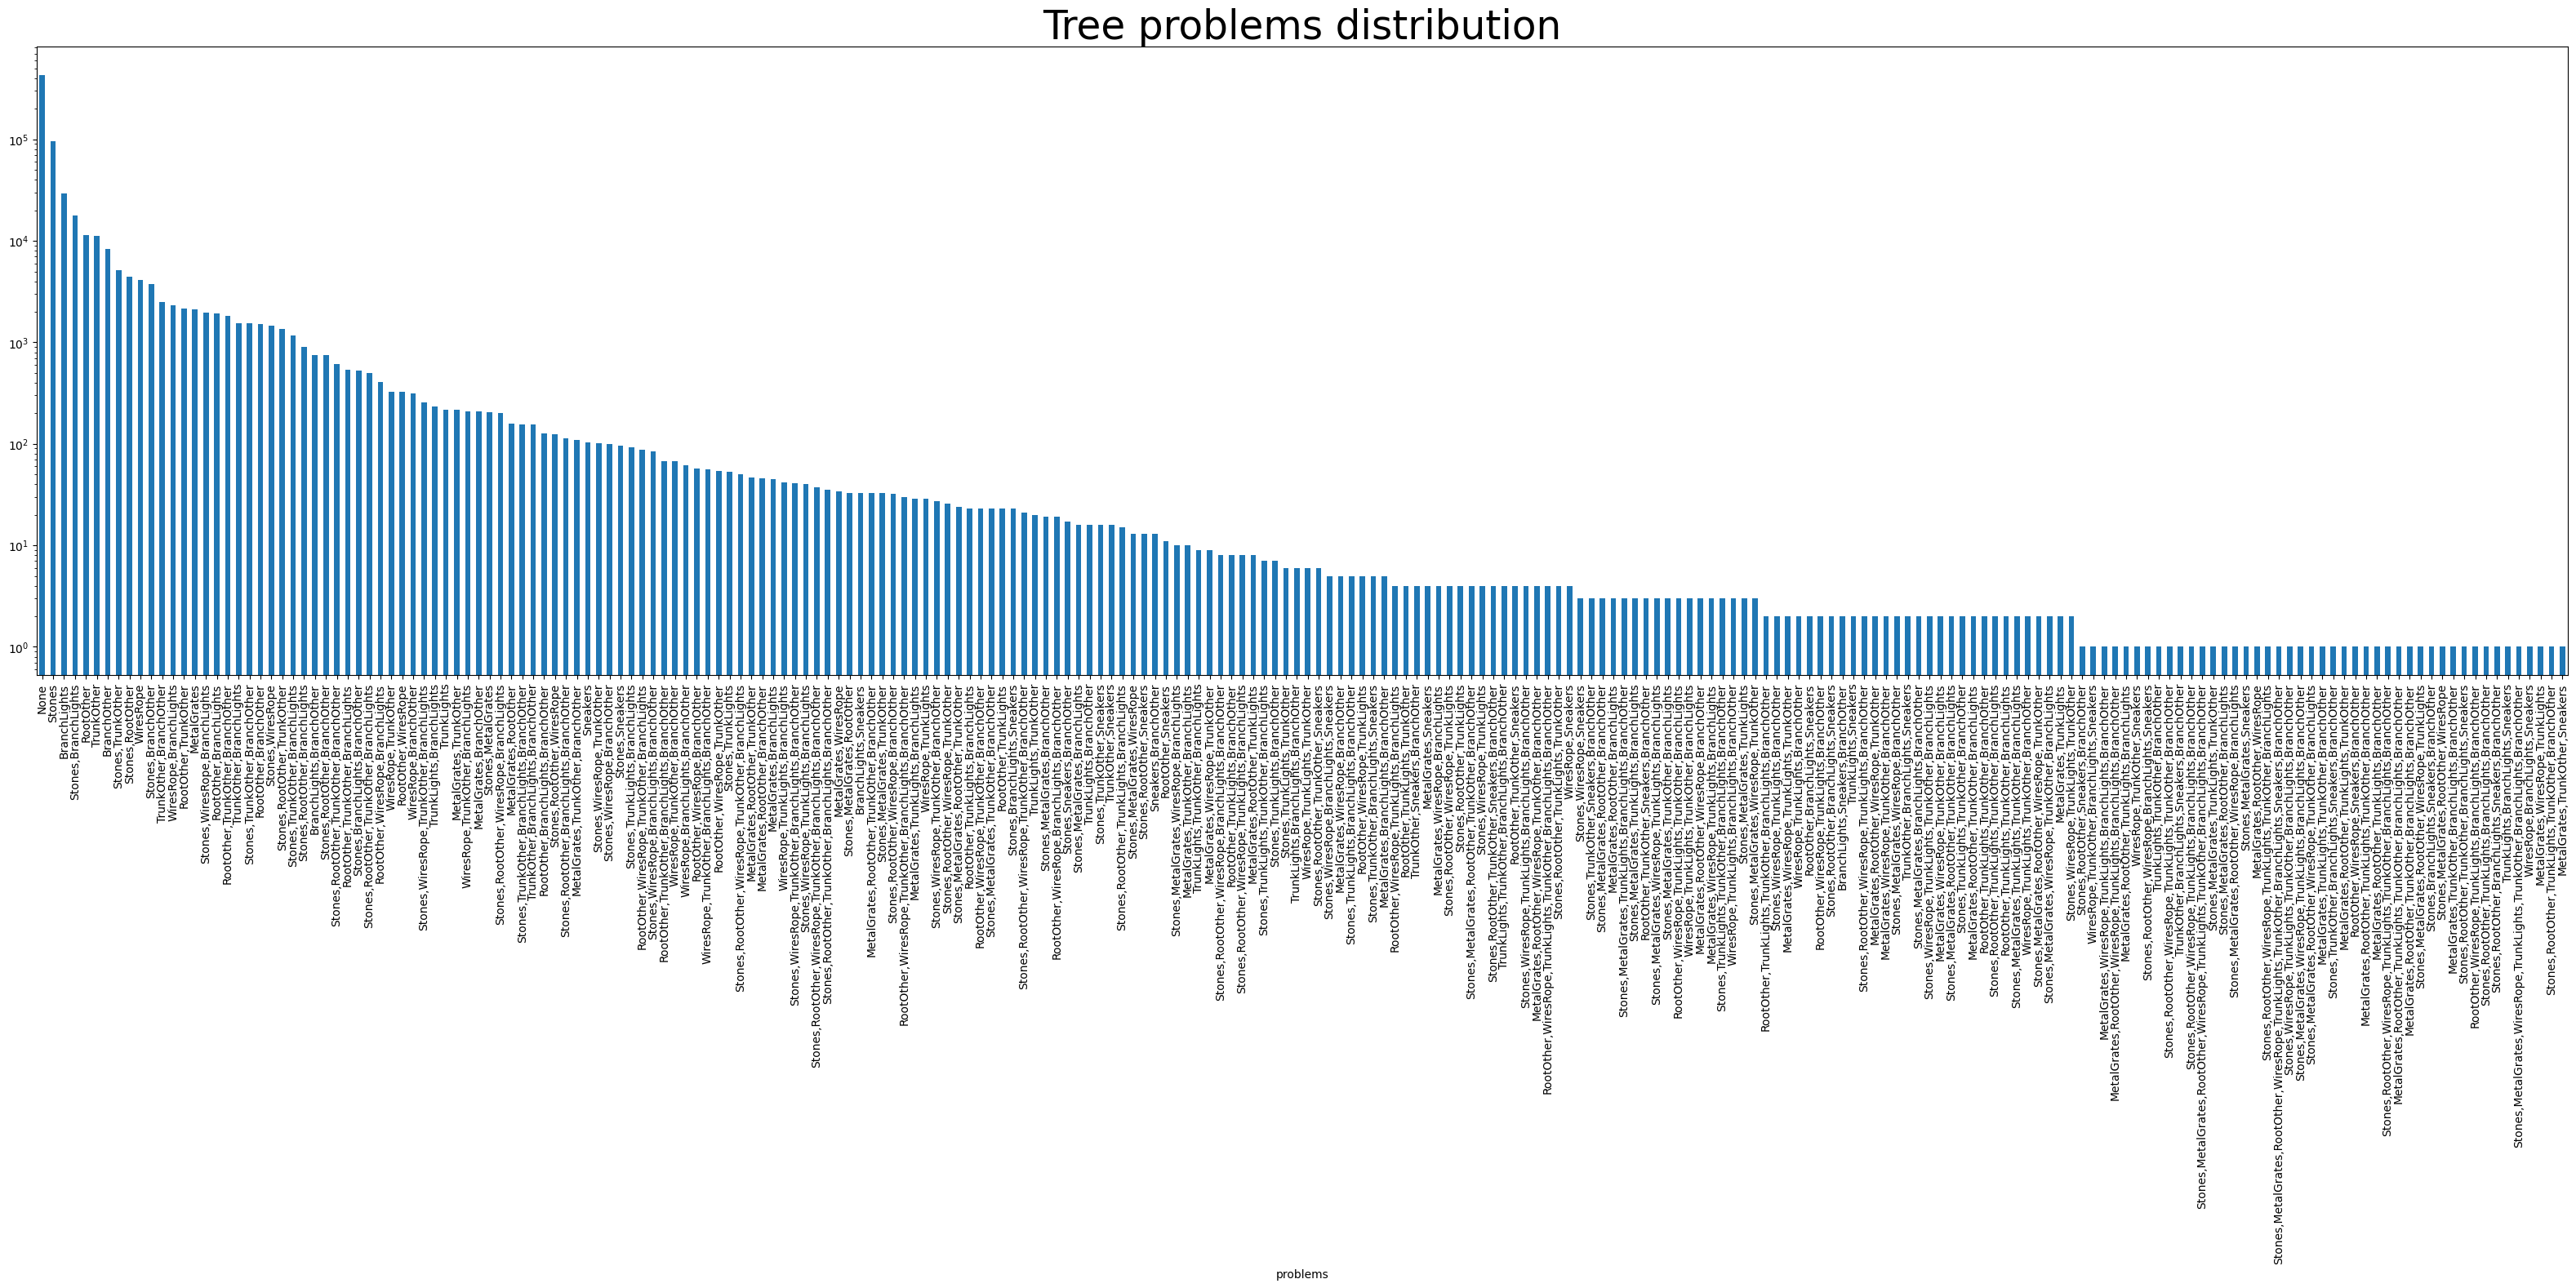

In [53]:
data["problems"].value_counts().plot(kind="bar", logy=True, figsize=(40, 10))
plt.title("Tree problems distribution", fontsize=35)
plt.show()

* Checking values of the 'problems' column and verifying that these values match the name of existing binary columns for these problems. --> need some transformation for values of the 'problems' column

In [1]:
data["problems"].unique()

NameError: name 'data' is not defined

## Outlier visualisation

* Conventional methods for detecting outliers such as IQR, Z-score, and others are not applicable in this case, since data on all possible trees that are important for learning the distribution will be lost.

In [ ]:
min_tree_value = 0
max_tree_value = 457  # dbh of the world's thickest tree
outliers_idxs = data.loc[
    (data["tree_dbh"] < min_tree_value) | (data["tree_dbh"] > max_tree_value)
].index

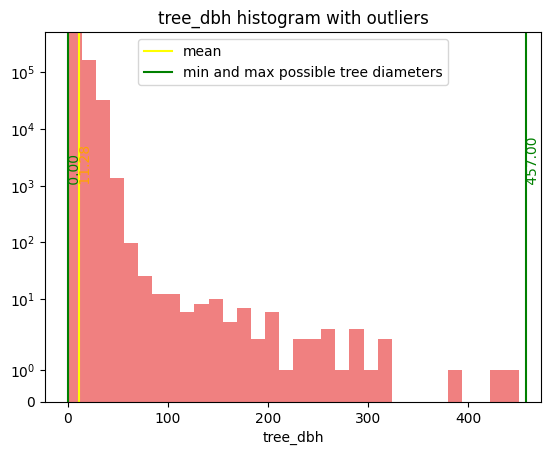

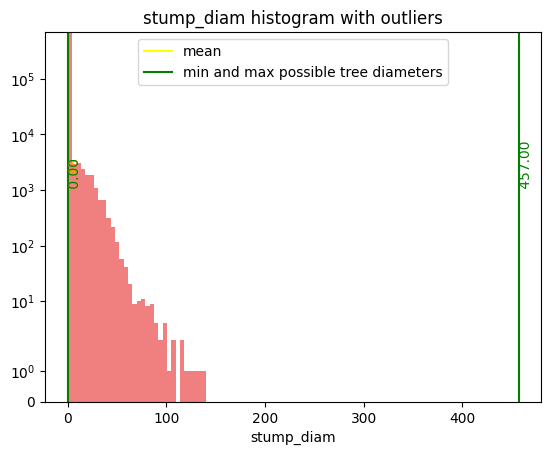

In [16]:
# Visualisation of outliers
tree_columns = ["tree_dbh", "stump_diam"]

for column in tree_columns:
    plt.hist(data[column], bins=32, color="lightcoral")

    plt.axvline(data[column].mean(), color="yellow")
    plt.axvline(min_tree_value, color="green")
    plt.axvline(max_tree_value, color="green")

    plt.text(
        data[column].mean(),
        1000,
        s=f"{data[column].mean() : .2f}",
        rotation=90,
        color="orange",
    )
    plt.text(
        min_tree_value, 1000, s=f"{min_tree_value : .2f}", rotation=90, color="green"
    )
    plt.text(
        max_tree_value, 1000, s=f"{max_tree_value : .2f}", rotation=90, color="green"
    )

    plt.legend(["mean", "min and max possible tree diameters"])

    plt.title(f"{column} histogram with outliers")

    plt.xlabel(column)

    plt.yscale("symlog")

    plt.show()

## Target value distribution

* There is a large imbalance in the classes of the target feature

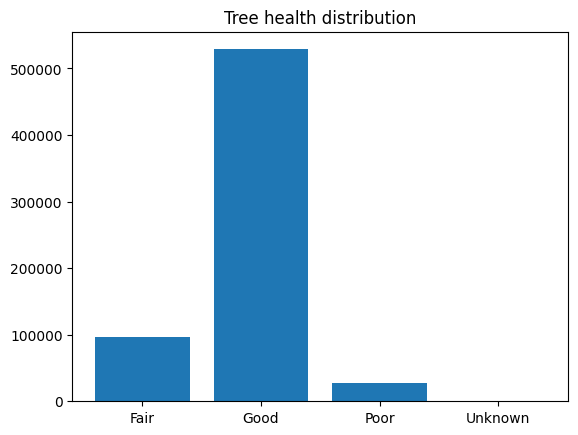

In [ ]:
categories = data["health"].unique()
for i, category in enumerate(categories):
    if category is np.nan:
        categories[i] = "Unknown"
values = [data.loc[data["health"] == category].shape[0] for category in categories]

plt.bar(categories, values)
plt.title("Tree health distribution")
plt.show()

print(data["health"].value_counts())

* Applying initial data transformations and saving the transformed dataset.

## NA analysis

In [90]:
print(data.dropna(subset=["health"]).isnull().sum())
print(
    "\nTree problems series:\n", data.dropna(subset=["health"])[data["problems"].isna()]
)

created_at             0
tree_dbh               0
stump_diam             0
curb_loc               0
status                 0
health                 0
spc_latin              5
spc_common             5
steward                0
guards                 1
sidewalk               1
user_type              0
problems              49
root_stone             0
root_grate             0
root_other             0
trunk_wire             0
trnk_light             0
trnk_other             0
brch_light             0
brch_shoe              0
brch_other             0
address                0
postcode               0
zip_city               0
community board        0
borocode               0
borough                0
cncldist               0
st_assem               0
st_senate              0
nta                    0
nta_name               0
boro_ct                0
state                  0
latitude               0
longitude              0
x_sp                   0
y_sp                   0
council district    6206


C:\Users\user\AppData\Local\Temp\ipykernel_27348\1148805964.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("\nTree problems series:\n",data.dropna(subset=["health"])[data["problems"].isna()])


In [99]:
set(data["spc_latin"].unique()) - set(
    data.iloc[:, :-4]
    .dropna(subset=["health", "spc_latin", "spc_common"])["spc_latin"]
    .unique()
)

{nan}

* Check tree species after NA processing

In [107]:
data_after_na_processing = data.iloc[:, :-4].dropna(
    subset=["health", "spc_latin", "spc_common"]
)

print(
    "Number of unique tree species before NA processing : ", data["spc_latin"].nunique()
)
print(
    "Number of unique tree species after NA processing : ",
    data_after_na_processing["spc_latin"].nunique(),
)
print(
    "Difference: ",
    set(data["spc_latin"].unique())
    - set(data_after_na_processing["spc_latin"].unique()),
)
print("\n")
print(
    "Number of unique tree species aliases before NA processing : ",
    data["spc_common"].nunique(),
)
print(
    "Number of unique tree species aliases after NA processing : ",
    data_after_na_processing["spc_common"].nunique(),
)
print(
    "Difference: ",
    set(data["spc_common"].unique())
    - set(data_after_na_processing["spc_common"].unique()),
)

Number of unique tree species before NA processing :  132
Number of unique tree species after NA processing :  132
Difference:  {nan}


Number of unique tree species aliases before NA processing :  132
Number of unique tree species aliases after NA processing :  132
Difference:  {nan}


## Correlational analysis

In [6]:
data.head(3)

,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,2015-08-27,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,2015-09-03,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,2015-09-05,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


In [8]:
data_eda = EDA()

### Numeric features and ordinal target feature 

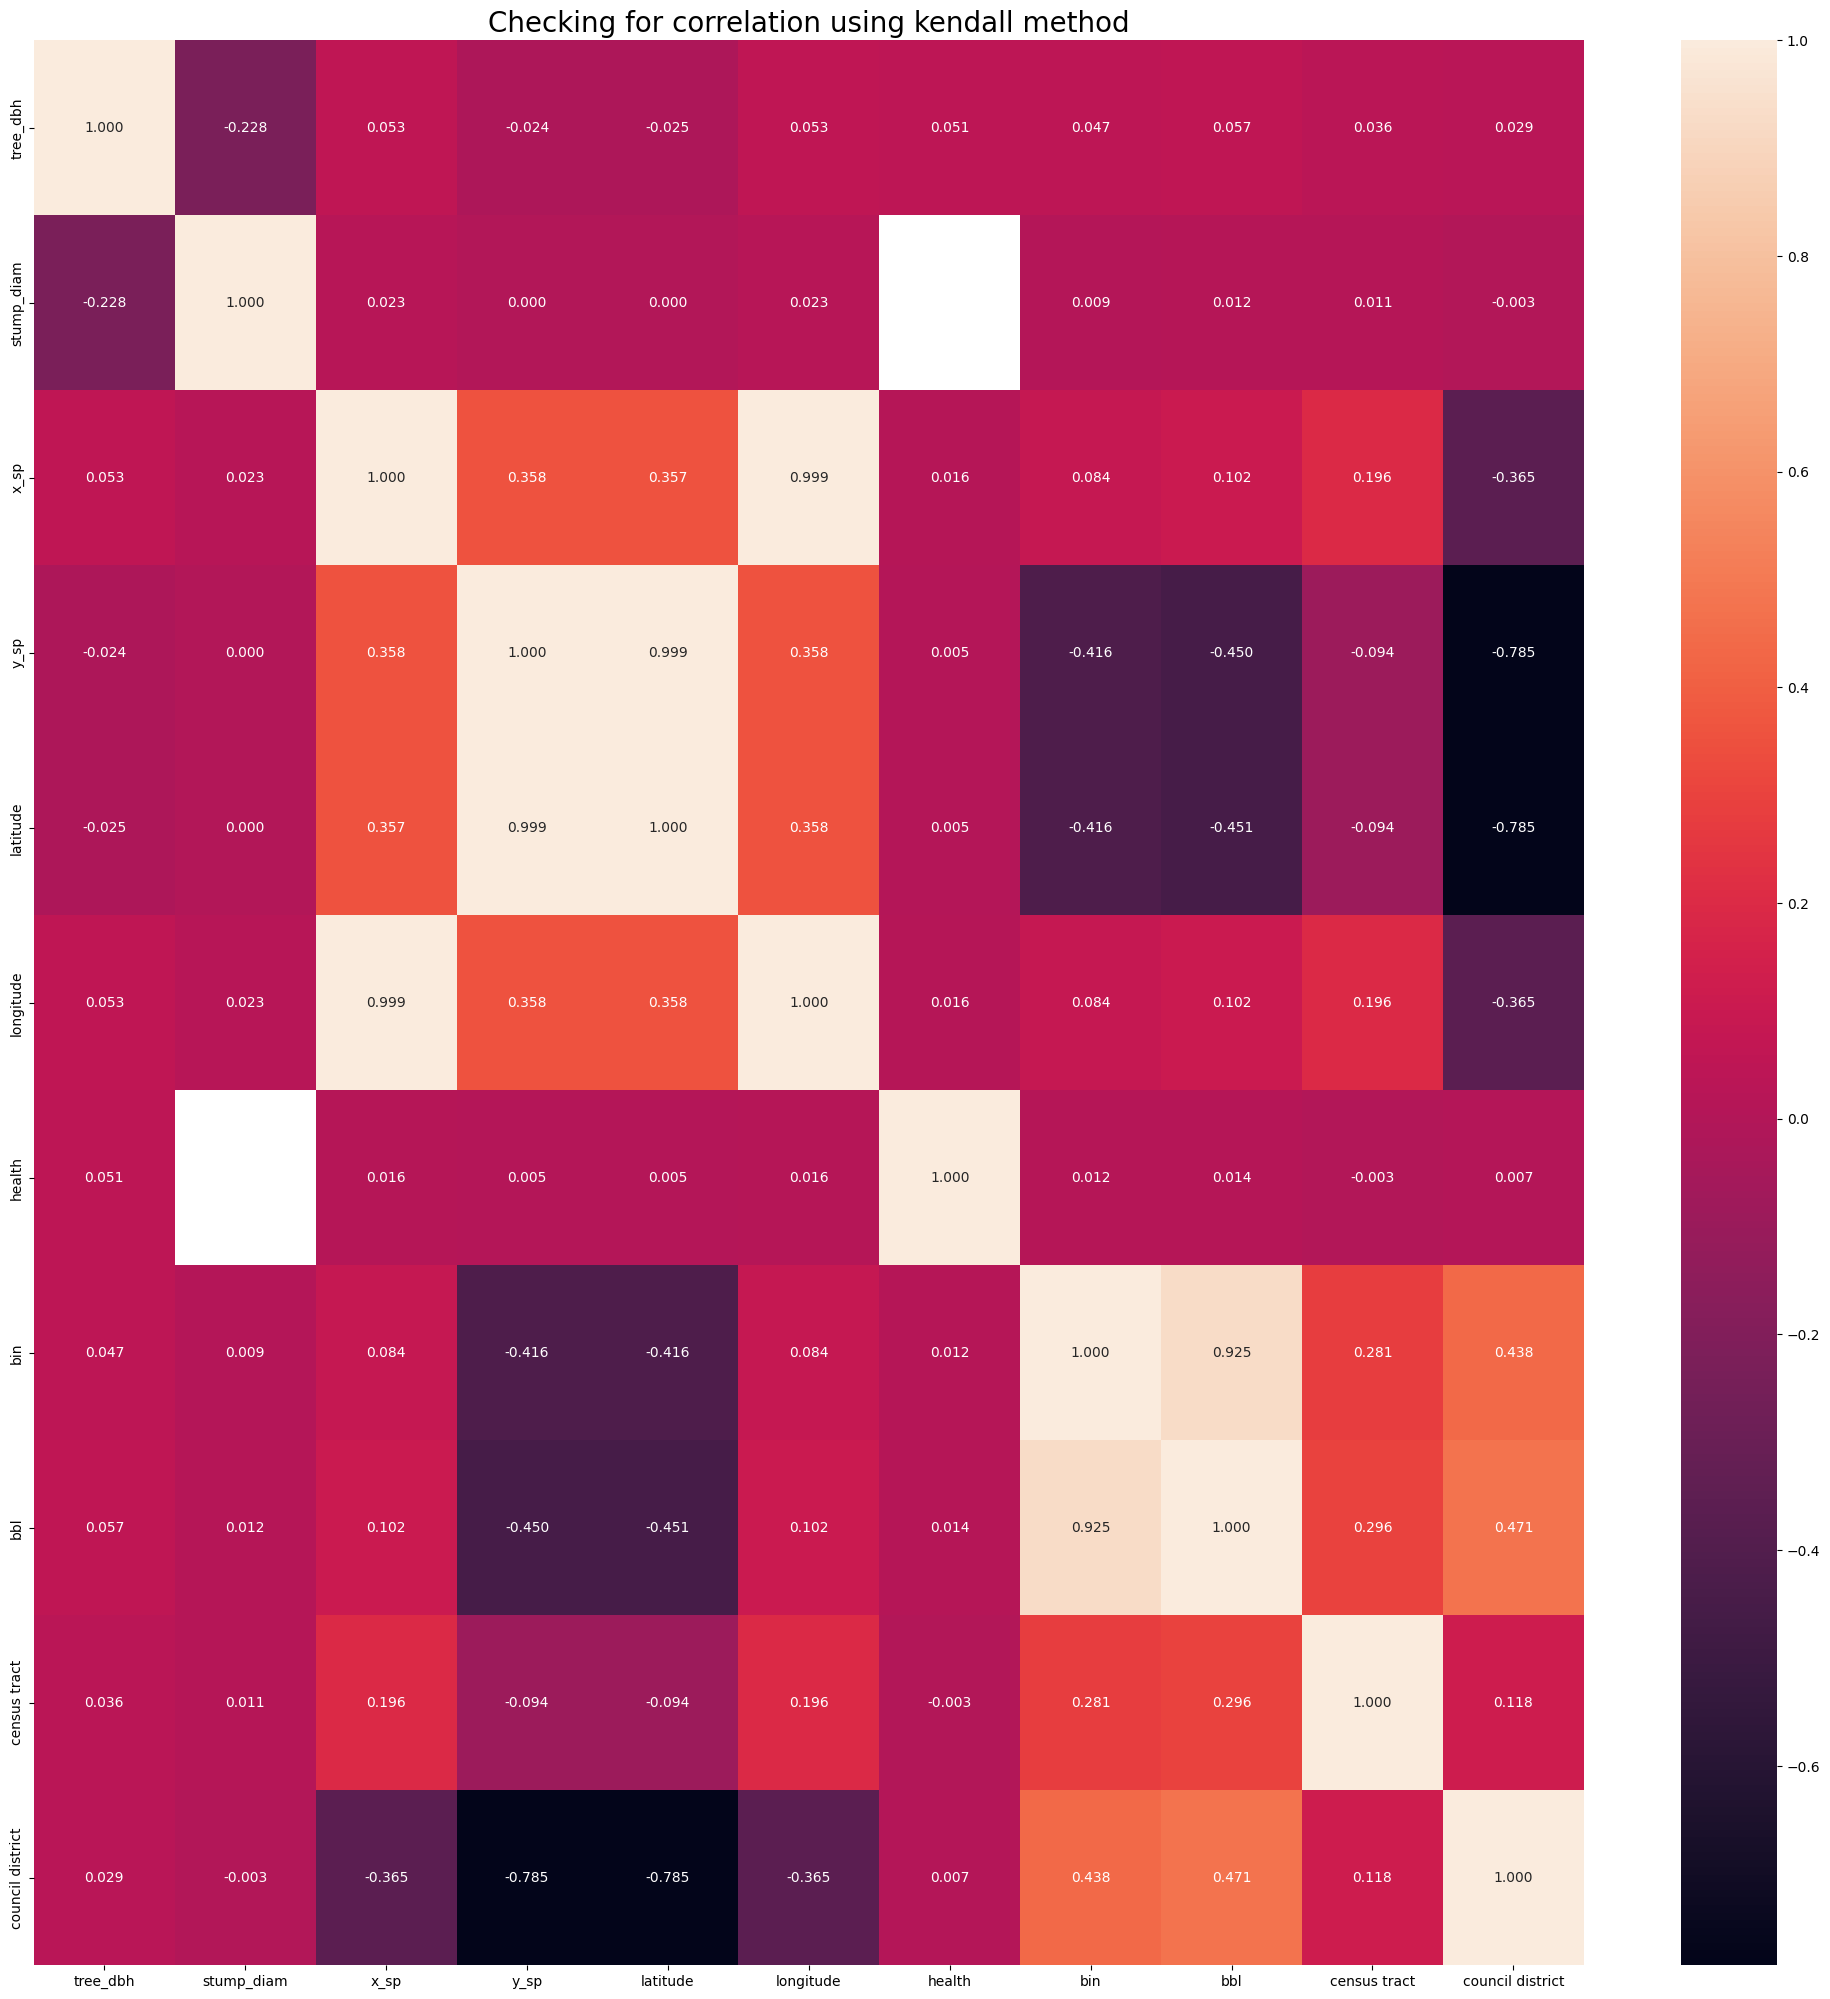

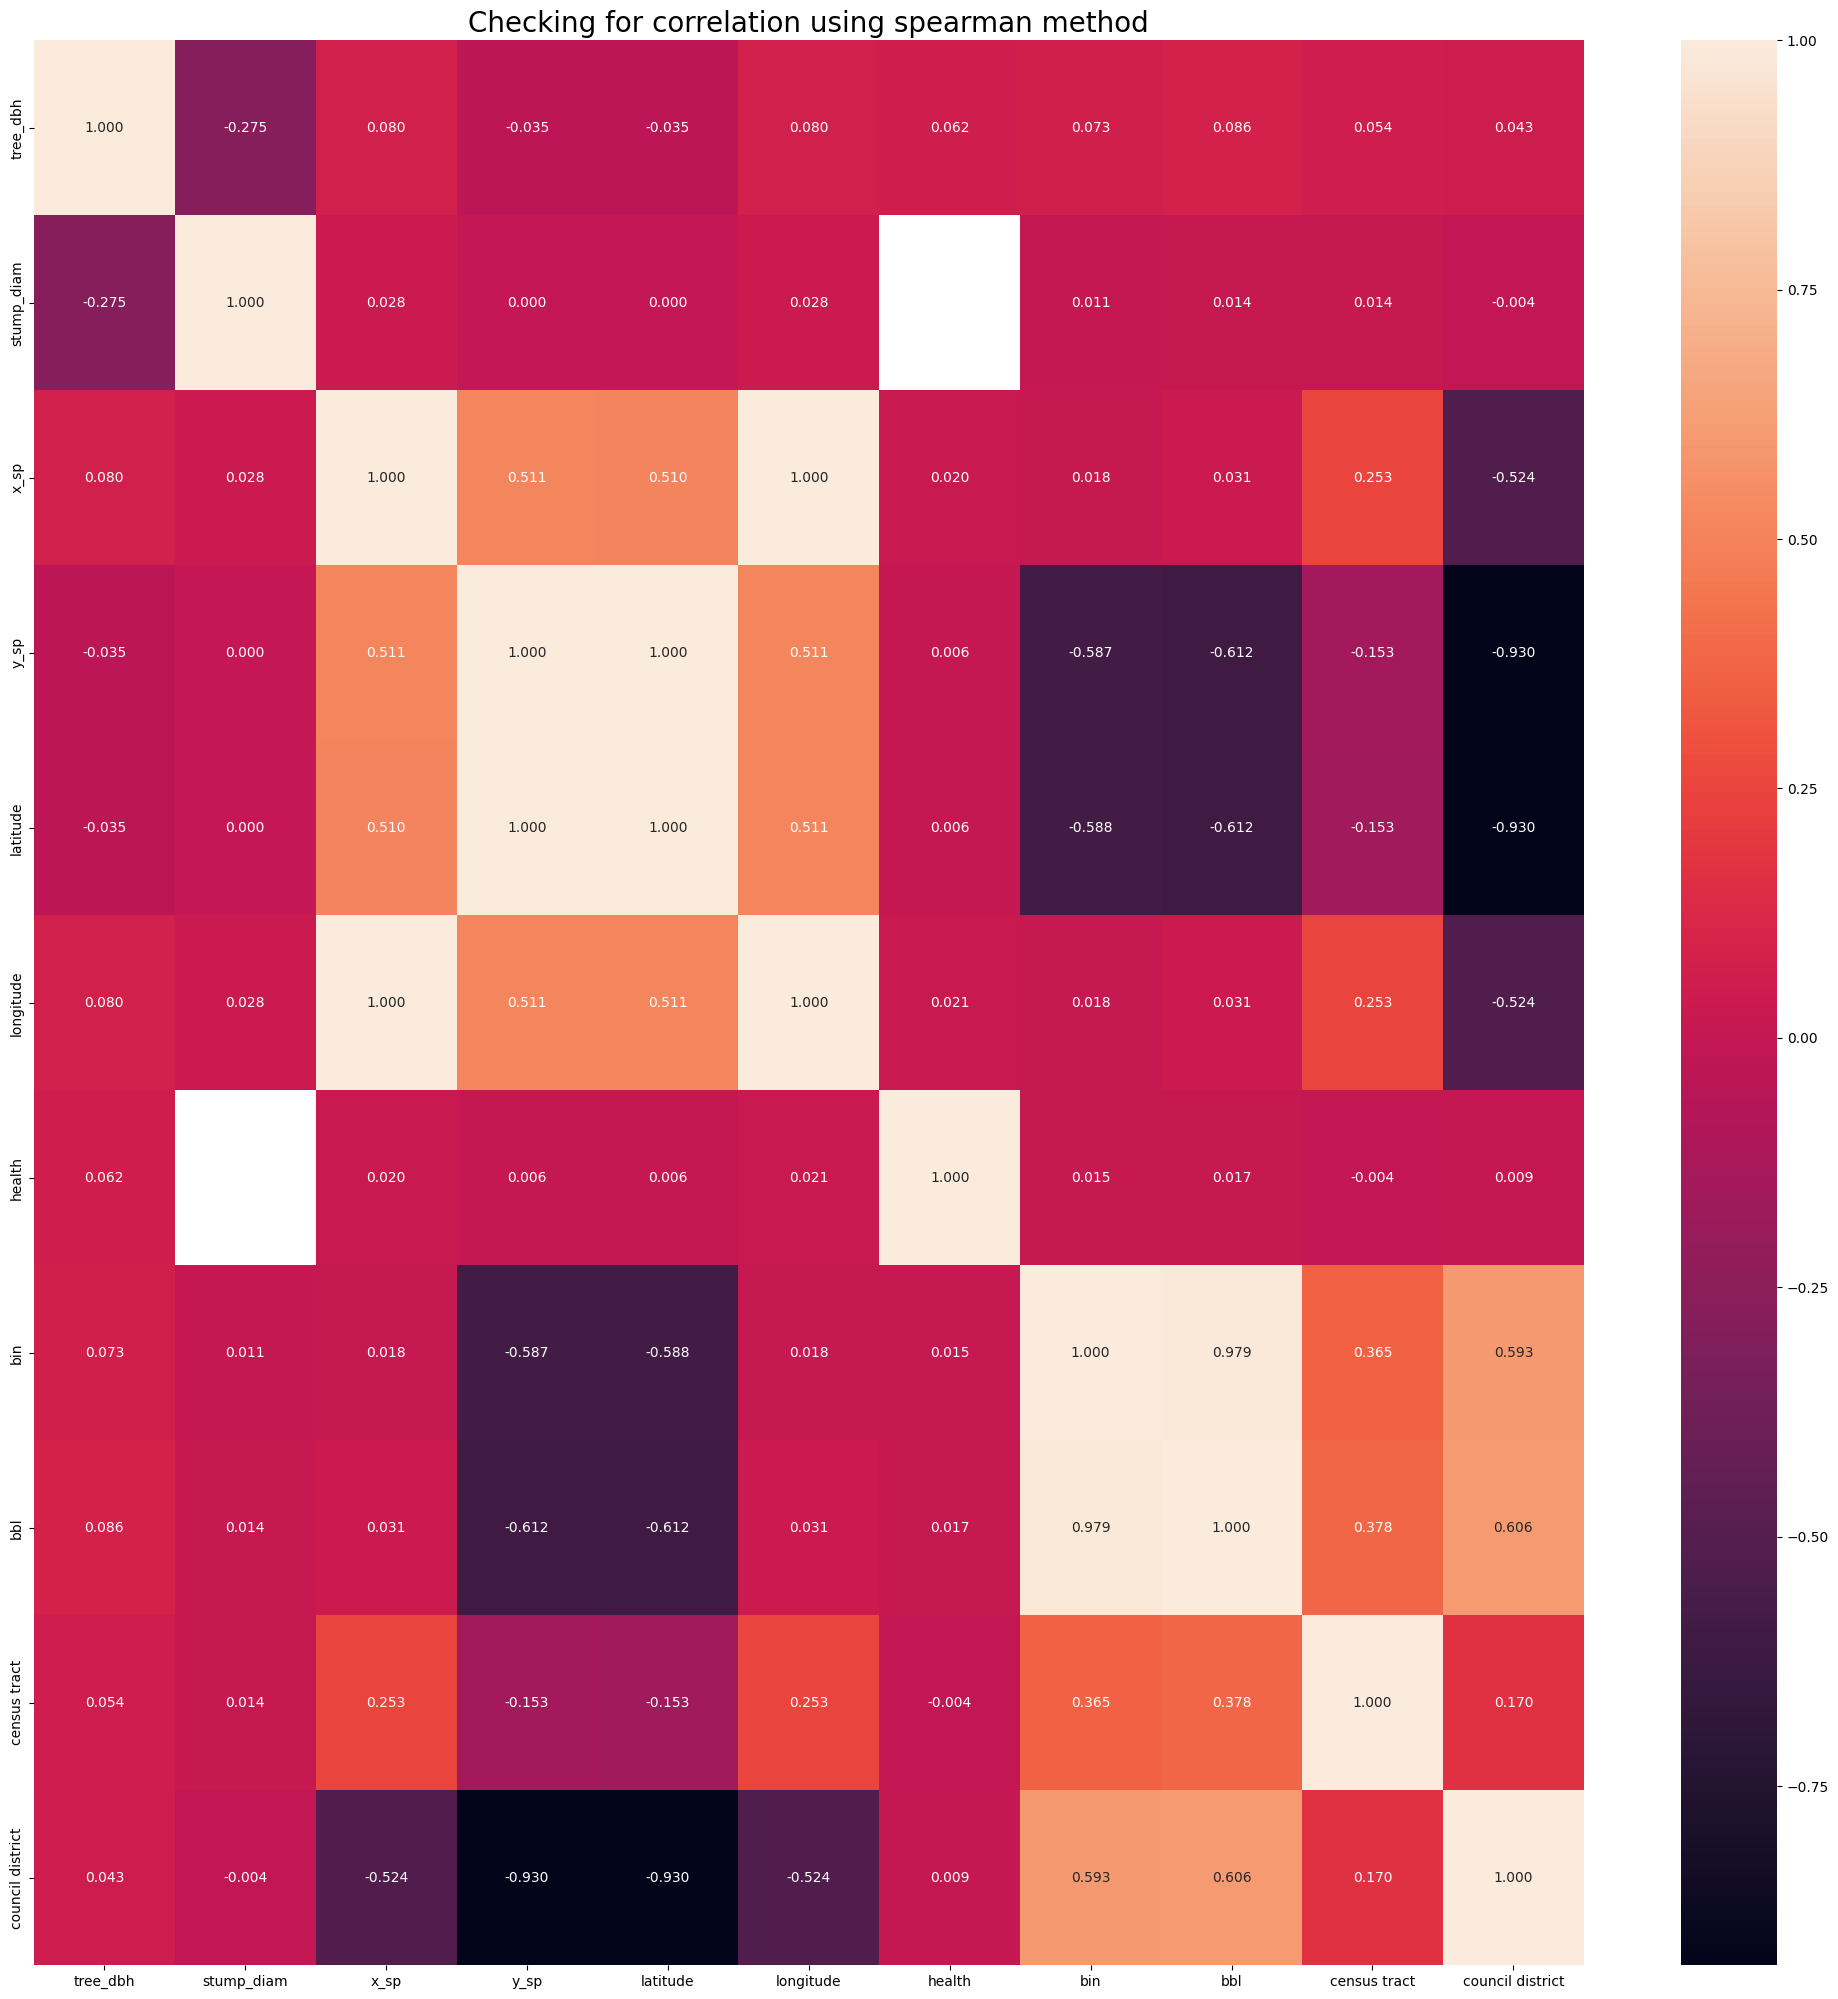

In [9]:
data.loc[data["health"] == "Poor", "health"] = 0
data.loc[data["health"] == "Fair", "health"] = 1
data.loc[data["health"] == "Good", "health"] = 2

data_eda.features_corr_check(
    df=data,
    columns=[
        "tree_dbh",
        "stump_diam",
        "x_sp",
        "y_sp",
        "latitude",
        "longitude",
        "health",
        "bin",
        "bbl",
        "census tract",
        "council district",
    ],
    methods=["kendall", "spearman"],
)

In [11]:
categorical_features = []

for column, dtype in data.dtypes.items():
    if dtype == np.object_:
        if column == "health":
            continue
        categorical_features.append(column)

categorical_features = categorical_features + [
    "postcode",
    "borocode",
    "cncldist",
    "st_assem",
    "st_senate",
]

In [ ]:
categorical_columns = categorical_features
correlations = {}
for column in categorical_columns:
    confusion_matrix = pd.crosstab(data[column], data["health"])
    correlations[column] = data_eda.cramers_v(confusion_matrix)

pd.DataFrame(list(correlations.items()), columns=["Column", "Correlation with Health"])

C:\Users\user\AppData\Local\Temp\ipykernel_13156\4146275227.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min(kcorr - 1, rcorr - 1))
C:\Users\user\AppData\Local\Temp\ipykernel_13156\4146275227.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min(kcorr - 1, rcorr - 1))


,Column,Correlation with Health
0,curb_loc,0.005551
1,status,NaN
2,spc_latin,0.112692
3,spc_common,0.112692
4,steward,0.007637
5,guards,0.020891
6,sidewalk,0.020202
7,user_type,0.025239
8,problems,0.144972
9,root_stone,0.030347
